# Predicting Diabetes - Classifcation Task
Macro F1 score is the evaluation metric

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("diabetes_train.csv")

## Get to know the data

In [3]:
df_train.head(5)

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  576 non-null    int64  
 1   num_times_pregnant  576 non-null    int64  
 2   plasma_glucose      576 non-null    int64  
 3   DBP                 576 non-null    int64  
 4   triceps_skin        576 non-null    int64  
 5   serum_insulin       576 non-null    int64  
 6   BMI                 576 non-null    float64
 7   pedigree            576 non-null    float64
 8   age                 576 non-null    int64  
 9   diabetes            576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


## Split Data

In [5]:
from sklearn.model_selection import train_test_split

Id_col = 'Id'
target_col = 'diabetes'

X = df_train.drop([Id_col, target_col], axis=1)
y = df_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

array([[<AxesSubplot:title={'center':'num_times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose'}>,
        <AxesSubplot:title={'center':'DBP'}>],
       [<AxesSubplot:title={'center':'triceps_skin'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

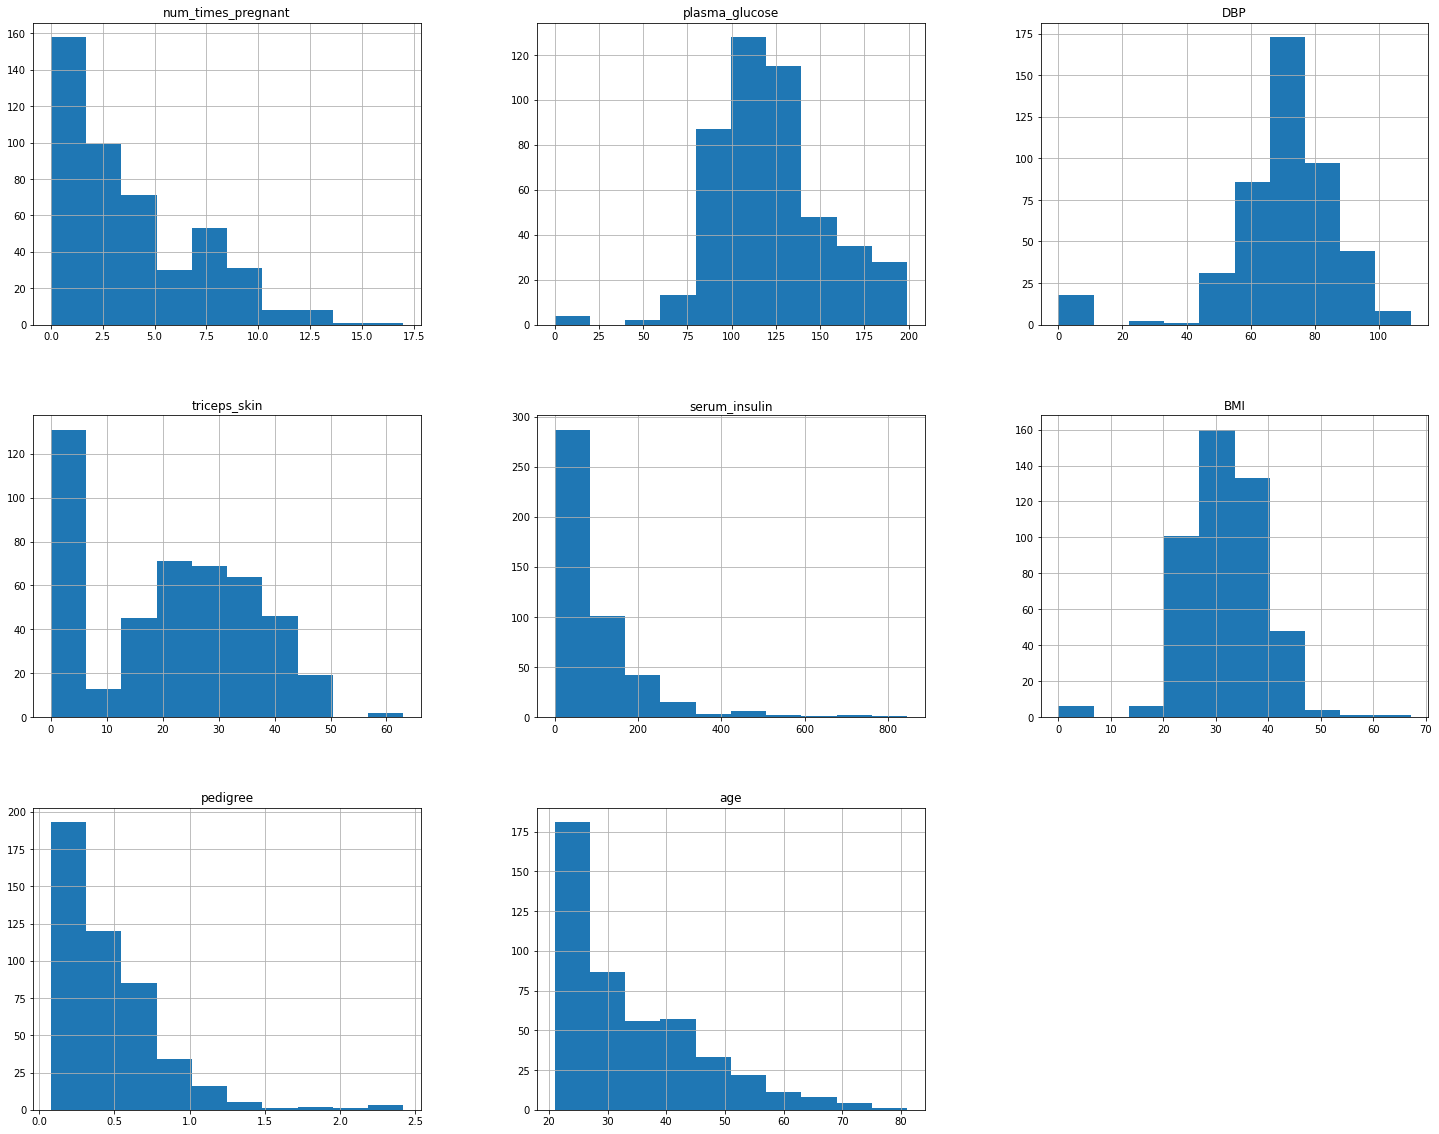

In [6]:
X_train.hist(figsize=(25, 20))

## Build AutoML Model
Use AutoML to get a sense of which algorithm works best

In [7]:
from flaml import AutoML
automl_clf = AutoML()
automl_clf.fit(X_train, y_train, task="classification", time_budget=500, verbose=3)

[flaml.automl: 01-21 12:35:38] {1926} INFO - task = classification
[flaml.automl: 01-21 12:35:38] {1928} INFO - Data split method: stratified
[flaml.automl: 01-21 12:35:38] {1932} INFO - Evaluation method: cv
[flaml.automl: 01-21 12:35:38] {1999} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 01-21 12:35:38] {2051} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 01-21 12:35:38] {2291} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-21 12:35:39] {2404} INFO - Estimated sufficient time budget=10026s. Estimated necessary time budget=246s.
[flaml.automl: 01-21 12:35:39] {2479} INFO -  at 1.1s,	estimator lgbm's best error=0.1770,	best estimator lgbm's best error=0.1770
[flaml.automl: 01-21 12:35:39] {2291} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-21 12:35:39] {2479} INFO -  at 1.1s,	estimator lgbm's best error=0.1770,	best estimator lgbm's best error=0.1770
[flaml.au

[flaml.automl: 01-21 12:35:41] {2479} INFO -  at 2.7s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:41] {2291} INFO - iteration 37, current learner lgbm
[flaml.automl: 01-21 12:35:41] {2479} INFO -  at 2.7s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:41] {2291} INFO - iteration 38, current learner lgbm
[flaml.automl: 01-21 12:35:41] {2479} INFO -  at 2.8s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:41] {2291} INFO - iteration 39, current learner lgbm
[flaml.automl: 01-21 12:35:41] {2479} INFO -  at 2.8s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:41] {2291} INFO - iteration 40, current learner lgbm
[flaml.automl: 01-21 12:35:41] {2479} INFO -  at 2.9s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:3

[flaml.automl: 01-21 12:35:44] {2479} INFO -  at 5.8s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:44] {2291} INFO - iteration 75, current learner lgbm
[flaml.automl: 01-21 12:35:44] {2479} INFO -  at 5.9s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:44] {2291} INFO - iteration 76, current learner extra_tree
[flaml.automl: 01-21 12:35:44] {2479} INFO -  at 6.0s,	estimator extra_tree's best error=0.1785,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:44] {2291} INFO - iteration 77, current learner xgboost
[flaml.automl: 01-21 12:35:44] {2479} INFO -  at 6.0s,	estimator xgboost's best error=0.1660,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:44] {2291} INFO - iteration 78, current learner lgbm
[flaml.automl: 01-21 12:35:44] {2479} INFO -  at 6.1s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.

[flaml.automl: 01-21 12:35:48] {2291} INFO - iteration 113, current learner extra_tree
[flaml.automl: 01-21 12:35:48] {2479} INFO -  at 10.0s,	estimator extra_tree's best error=0.1751,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:48] {2291} INFO - iteration 114, current learner lgbm
[flaml.automl: 01-21 12:35:48] {2479} INFO -  at 10.1s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:48] {2291} INFO - iteration 115, current learner lgbm
[flaml.automl: 01-21 12:35:48] {2479} INFO -  at 10.1s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:48] {2291} INFO - iteration 116, current learner xgboost
[flaml.automl: 01-21 12:35:48] {2479} INFO -  at 10.2s,	estimator xgboost's best error=0.1651,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:48] {2291} INFO - iteration 117, current learner rf
[flaml.automl: 01-21 12:35:48] {2479} INFO -  at 10

[flaml.automl: 01-21 12:35:51] {2291} INFO - iteration 152, current learner lgbm
[flaml.automl: 01-21 12:35:51] {2479} INFO -  at 12.9s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:51] {2291} INFO - iteration 153, current learner lgbm
[flaml.automl: 01-21 12:35:51] {2479} INFO -  at 13.0s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:51] {2291} INFO - iteration 154, current learner lgbm
[flaml.automl: 01-21 12:35:51] {2479} INFO -  at 13.0s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:51] {2291} INFO - iteration 155, current learner extra_tree
[flaml.automl: 01-21 12:35:51] {2479} INFO -  at 13.1s,	estimator extra_tree's best error=0.1751,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:51] {2291} INFO - iteration 156, current learner rf
[flaml.automl: 01-21 12:35:51] {2479} INFO -  at 13.2s,	e

[flaml.automl: 01-21 12:35:54] {2479} INFO -  at 15.6s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:54] {2291} INFO - iteration 191, current learner lgbm
[flaml.automl: 01-21 12:35:54] {2479} INFO -  at 15.6s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:54] {2291} INFO - iteration 192, current learner lgbm
[flaml.automl: 01-21 12:35:54] {2479} INFO -  at 15.7s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:54] {2291} INFO - iteration 193, current learner extra_tree
[flaml.automl: 01-21 12:35:54] {2479} INFO -  at 15.8s,	estimator extra_tree's best error=0.1751,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:54] {2291} INFO - iteration 194, current learner lgbm
[flaml.automl: 01-21 12:35:54] {2479} INFO -  at 15.8s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[fla

[flaml.automl: 01-21 12:35:56] {2479} INFO -  at 18.0s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:56] {2291} INFO - iteration 229, current learner extra_tree
[flaml.automl: 01-21 12:35:56] {2479} INFO -  at 18.1s,	estimator extra_tree's best error=0.1751,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:56] {2291} INFO - iteration 230, current learner lgbm
[flaml.automl: 01-21 12:35:56] {2479} INFO -  at 18.1s,	estimator lgbm's best error=0.1563,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:56] {2291} INFO - iteration 231, current learner xgboost
[flaml.automl: 01-21 12:35:56] {2479} INFO -  at 18.2s,	estimator xgboost's best error=0.1651,	best estimator lgbm's best error=0.1563
[flaml.automl: 01-21 12:35:56] {2291} INFO - iteration 232, current learner xgboost
[flaml.automl: 01-21 12:35:56] {2479} INFO -  at 18.3s,	estimator xgboost's best error=0.1651,	best estimator lgbm's best error

[flaml.automl: 01-21 12:35:59] {2291} INFO - iteration 266, current learner xgboost
[flaml.automl: 01-21 12:35:59] {2479} INFO -  at 21.0s,	estimator xgboost's best error=0.1558,	best estimator xgboost's best error=0.1558
[flaml.automl: 01-21 12:35:59] {2291} INFO - iteration 267, current learner xgboost
[flaml.automl: 01-21 12:35:59] {2479} INFO -  at 21.1s,	estimator xgboost's best error=0.1558,	best estimator xgboost's best error=0.1558
[flaml.automl: 01-21 12:35:59] {2291} INFO - iteration 268, current learner xgboost
[flaml.automl: 01-21 12:35:59] {2479} INFO -  at 21.1s,	estimator xgboost's best error=0.1558,	best estimator xgboost's best error=0.1558
[flaml.automl: 01-21 12:35:59] {2291} INFO - iteration 269, current learner xgboost
[flaml.automl: 01-21 12:35:59] {2479} INFO -  at 21.3s,	estimator xgboost's best error=0.1558,	best estimator xgboost's best error=0.1558
[flaml.automl: 01-21 12:35:59] {2291} INFO - iteration 270, current learner xgboost
[flaml.automl: 01-21 12:35:5

[flaml.automl: 01-21 12:36:02] {2291} INFO - iteration 303, current learner lgbm
[flaml.automl: 01-21 12:36:02] {2479} INFO -  at 24.4s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1552
[flaml.automl: 01-21 12:36:02] {2291} INFO - iteration 304, current learner xgboost
[flaml.automl: 01-21 12:36:03] {2479} INFO -  at 24.5s,	estimator xgboost's best error=0.1552,	best estimator xgboost's best error=0.1552
[flaml.automl: 01-21 12:36:03] {2291} INFO - iteration 305, current learner xgboost
[flaml.automl: 01-21 12:36:03] {2479} INFO -  at 24.6s,	estimator xgboost's best error=0.1552,	best estimator xgboost's best error=0.1552
[flaml.automl: 01-21 12:36:03] {2291} INFO - iteration 306, current learner xgboost
[flaml.automl: 01-21 12:36:03] {2479} INFO -  at 24.7s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:03] {2291} INFO - iteration 307, current learner xgboost
[flaml.automl: 01-21 12:36:03] {24

[flaml.automl: 01-21 12:36:06] {2479} INFO -  at 28.1s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:06] {2291} INFO - iteration 341, current learner xgboost
[flaml.automl: 01-21 12:36:06] {2479} INFO -  at 28.2s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:06] {2291} INFO - iteration 342, current learner xgboost
[flaml.automl: 01-21 12:36:06] {2479} INFO -  at 28.4s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:06] {2291} INFO - iteration 343, current learner xgboost
[flaml.automl: 01-21 12:36:07] {2479} INFO -  at 28.5s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:07] {2291} INFO - iteration 344, current learner xgboost
[flaml.automl: 01-21 12:36:07] {2479} INFO -  at 28.6s,	estimator xgboost's best error=0.1541,	best estimator xg

[flaml.automl: 01-21 12:36:10] {2291} INFO - iteration 378, current learner lgbm
[flaml.automl: 01-21 12:36:10] {2479} INFO -  at 31.9s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:10] {2291} INFO - iteration 379, current learner xgboost
[flaml.automl: 01-21 12:36:10] {2479} INFO -  at 32.0s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:10] {2291} INFO - iteration 380, current learner xgboost
[flaml.automl: 01-21 12:36:10] {2479} INFO -  at 32.2s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:10] {2291} INFO - iteration 381, current learner xgboost
[flaml.automl: 01-21 12:36:10] {2479} INFO -  at 32.3s,	estimator xgboost's best error=0.1541,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:10] {2291} INFO - iteration 382, current learner xgboost
[flaml.automl: 01-21 12:36:10] {24

[flaml.automl: 01-21 12:36:13] {2479} INFO -  at 35.4s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:13] {2291} INFO - iteration 416, current learner extra_tree
[flaml.automl: 01-21 12:36:14] {2479} INFO -  at 35.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:14] {2291} INFO - iteration 417, current learner extra_tree
[flaml.automl: 01-21 12:36:14] {2479} INFO -  at 35.6s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:14] {2291} INFO - iteration 418, current learner extra_tree
[flaml.automl: 01-21 12:36:14] {2479} INFO -  at 35.8s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:14] {2291} INFO - iteration 419, current learner xgboost
[flaml.automl: 01-21 12:36:14] {2479} INFO -  at 35.9s,	estimator xgboost's best error=0.15

[flaml.automl: 01-21 12:36:17] {2479} INFO -  at 38.9s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:17] {2291} INFO - iteration 453, current learner lgbm
[flaml.automl: 01-21 12:36:17] {2479} INFO -  at 39.0s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:17] {2291} INFO - iteration 454, current learner lgbm
[flaml.automl: 01-21 12:36:17] {2479} INFO -  at 39.0s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:17] {2291} INFO - iteration 455, current learner extra_tree
[flaml.automl: 01-21 12:36:17] {2479} INFO -  at 39.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1541
[flaml.automl: 01-21 12:36:17] {2291} INFO - iteration 456, current learner extra_tree
[flaml.automl: 01-21 12:36:17] {2479} INFO -  at 39.3s,	estimator extra_tree's best error=0.1636,	best estimator xgboo

[flaml.automl: 01-21 12:36:21] {2479} INFO -  at 42.8s,	estimator xgboost's best error=0.1531,	best estimator xgboost's best error=0.1531
[flaml.automl: 01-21 12:36:21] {2291} INFO - iteration 490, current learner xgboost
[flaml.automl: 01-21 12:36:21] {2479} INFO -  at 42.9s,	estimator xgboost's best error=0.1531,	best estimator xgboost's best error=0.1531
[flaml.automl: 01-21 12:36:21] {2291} INFO - iteration 491, current learner lgbm
[flaml.automl: 01-21 12:36:21] {2479} INFO -  at 42.9s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1531
[flaml.automl: 01-21 12:36:21] {2291} INFO - iteration 492, current learner xgboost
[flaml.automl: 01-21 12:36:21] {2479} INFO -  at 43.0s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:21] {2291} INFO - iteration 493, current learner xgboost
[flaml.automl: 01-21 12:36:21] {2479} INFO -  at 43.1s,	estimator xgboost's best error=0.1523,	best estimator xgboost'

[flaml.automl: 01-21 12:36:24] {2479} INFO -  at 46.1s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:24] {2291} INFO - iteration 527, current learner extra_tree
[flaml.automl: 01-21 12:36:24] {2479} INFO -  at 46.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:24] {2291} INFO - iteration 528, current learner xgboost
[flaml.automl: 01-21 12:36:24] {2479} INFO -  at 46.3s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:24] {2291} INFO - iteration 529, current learner lgbm
[flaml.automl: 01-21 12:36:24] {2479} INFO -  at 46.3s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:24] {2291} INFO - iteration 530, current learner xgboost
[flaml.automl: 01-21 12:36:24] {2479} INFO -  at 46.4s,	estimator xgboost's best error=0.1523,	best estimator

[flaml.automl: 01-21 12:36:27] {2479} INFO -  at 49.1s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:27] {2291} INFO - iteration 564, current learner lgbm
[flaml.automl: 01-21 12:36:27] {2479} INFO -  at 49.2s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:27] {2291} INFO - iteration 565, current learner xgboost
[flaml.automl: 01-21 12:36:27] {2479} INFO -  at 49.3s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:27] {2291} INFO - iteration 566, current learner extra_tree
[flaml.automl: 01-21 12:36:27] {2479} INFO -  at 49.4s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:27] {2291} INFO - iteration 567, current learner lgbm
[flaml.automl: 01-21 12:36:27] {2479} INFO -  at 49.4s,	estimator lgbm's best error=0.1563,	best estimator xgboost's b

[flaml.automl: 01-21 12:36:30] {2479} INFO -  at 52.3s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:30] {2291} INFO - iteration 601, current learner xgboost
[flaml.automl: 01-21 12:36:30] {2479} INFO -  at 52.4s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:30] {2291} INFO - iteration 602, current learner lgbm
[flaml.automl: 01-21 12:36:30] {2479} INFO -  at 52.4s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:30] {2291} INFO - iteration 603, current learner lgbm
[flaml.automl: 01-21 12:36:31] {2479} INFO -  at 52.5s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:31] {2291} INFO - iteration 604, current learner xgboost
[flaml.automl: 01-21 12:36:31] {2479} INFO -  at 52.6s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best er

[flaml.automl: 01-21 12:36:33] {2479} INFO -  at 55.4s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:33] {2291} INFO - iteration 638, current learner extra_tree
[flaml.automl: 01-21 12:36:34] {2479} INFO -  at 55.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:34] {2291} INFO - iteration 639, current learner lgbm
[flaml.automl: 01-21 12:36:34] {2479} INFO -  at 55.5s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:34] {2291} INFO - iteration 640, current learner extra_tree
[flaml.automl: 01-21 12:36:34] {2479} INFO -  at 55.6s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:34] {2291} INFO - iteration 641, current learner lgbm
[flaml.automl: 01-21 12:36:34] {2479} INFO -  at 55.7s,	estimator lgbm's best error=0.1563,	best estimator xg

[flaml.automl: 01-21 12:36:37] {2291} INFO - iteration 675, current learner xgboost
[flaml.automl: 01-21 12:36:37] {2479} INFO -  at 59.2s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:37] {2291} INFO - iteration 676, current learner rf
[flaml.automl: 01-21 12:36:37] {2479} INFO -  at 59.3s,	estimator rf's best error=0.1662,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:37] {2291} INFO - iteration 677, current learner xgboost
[flaml.automl: 01-21 12:36:37] {2479} INFO -  at 59.4s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:37] {2291} INFO - iteration 678, current learner xgboost
[flaml.automl: 01-21 12:36:38] {2479} INFO -  at 59.5s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:38] {2291} INFO - iteration 679, current learner extra_tree
[flaml.automl: 01-21 12:36:38] {247

[flaml.automl: 01-21 12:36:41] {2479} INFO -  at 62.9s,	estimator rf's best error=0.1662,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:41] {2291} INFO - iteration 713, current learner xgboost
[flaml.automl: 01-21 12:36:41] {2479} INFO -  at 63.1s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:41] {2291} INFO - iteration 714, current learner rf
[flaml.automl: 01-21 12:36:41] {2479} INFO -  at 63.2s,	estimator rf's best error=0.1662,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:41] {2291} INFO - iteration 715, current learner xgboost
[flaml.automl: 01-21 12:36:41] {2479} INFO -  at 63.2s,	estimator xgboost's best error=0.1523,	best estimator xgboost's best error=0.1523
[flaml.automl: 01-21 12:36:41] {2291} INFO - iteration 716, current learner rf
[flaml.automl: 01-21 12:36:41] {2479} INFO -  at 63.4s,	estimator rf's best error=0.1662,	best estimator xgboost's best error=0.1523

[flaml.automl: 01-21 12:36:45] {2479} INFO -  at 67.1s,	estimator xgboost's best error=0.1523,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:45] {2291} INFO - iteration 751, current learner rf
[flaml.automl: 01-21 12:36:45] {2479} INFO -  at 67.3s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:45] {2291} INFO - iteration 752, current learner rf
[flaml.automl: 01-21 12:36:45] {2479} INFO -  at 67.4s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:45] {2291} INFO - iteration 753, current learner rf
[flaml.automl: 01-21 12:36:46] {2479} INFO -  at 67.5s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:46] {2291} INFO - iteration 754, current learner rf
[flaml.automl: 01-21 12:36:46] {2479} INFO -  at 67.7s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:46] {2291} I

[flaml.automl: 01-21 12:36:51] {2291} INFO - iteration 790, current learner extra_tree
[flaml.automl: 01-21 12:36:51] {2479} INFO -  at 72.8s,	estimator extra_tree's best error=0.1636,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:51] {2291} INFO - iteration 791, current learner rf
[flaml.automl: 01-21 12:36:51] {2479} INFO -  at 72.9s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:51] {2291} INFO - iteration 792, current learner rf
[flaml.automl: 01-21 12:36:51] {2479} INFO -  at 73.1s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:51] {2291} INFO - iteration 793, current learner xgboost
[flaml.automl: 01-21 12:36:51] {2479} INFO -  at 73.2s,	estimator xgboost's best error=0.1523,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:51] {2291} INFO - iteration 794, current learner rf
[flaml.automl: 01-21 12:36:51] {2479} INFO -  at 73.3s,	estimator r

[flaml.automl: 01-21 12:36:56] {2291} INFO - iteration 829, current learner rf
[flaml.automl: 01-21 12:36:56] {2479} INFO -  at 78.2s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:56] {2291} INFO - iteration 830, current learner rf
[flaml.automl: 01-21 12:36:56] {2479} INFO -  at 78.3s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:56] {2291} INFO - iteration 831, current learner lgbm
[flaml.automl: 01-21 12:36:56] {2479} INFO -  at 78.4s,	estimator lgbm's best error=0.1563,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:56] {2291} INFO - iteration 832, current learner rf
[flaml.automl: 01-21 12:36:57] {2479} INFO -  at 78.5s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:36:57] {2291} INFO - iteration 833, current learner xgboost
[flaml.automl: 01-21 12:36:57] {2479} INFO -  at 78.6s,	estimator xgboost's best err

[flaml.automl: 01-21 12:37:01] {2291} INFO - iteration 868, current learner extra_tree
[flaml.automl: 01-21 12:37:01] {2479} INFO -  at 83.1s,	estimator extra_tree's best error=0.1636,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:01] {2291} INFO - iteration 869, current learner xgboost
[flaml.automl: 01-21 12:37:01] {2479} INFO -  at 83.2s,	estimator xgboost's best error=0.1523,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:01] {2291} INFO - iteration 870, current learner rf
[flaml.automl: 01-21 12:37:01] {2479} INFO -  at 83.3s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:01] {2291} INFO - iteration 871, current learner extra_tree
[flaml.automl: 01-21 12:37:01] {2479} INFO -  at 83.4s,	estimator extra_tree's best error=0.1636,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:01] {2291} INFO - iteration 872, current learner lgbm
[flaml.automl: 01-21 12:37:01] {2479} INFO -  at 

[flaml.automl: 01-21 12:37:06] {2291} INFO - iteration 907, current learner extra_tree
[flaml.automl: 01-21 12:37:06] {2479} INFO -  at 87.8s,	estimator extra_tree's best error=0.1636,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:06] {2291} INFO - iteration 908, current learner xgboost
[flaml.automl: 01-21 12:37:06] {2479} INFO -  at 87.9s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:06] {2291} INFO - iteration 909, current learner rf
[flaml.automl: 01-21 12:37:06] {2479} INFO -  at 88.1s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:06] {2291} INFO - iteration 910, current learner extra_tree
[flaml.automl: 01-21 12:37:06] {2479} INFO -  at 88.2s,	estimator extra_tree's best error=0.1636,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:06] {2291} INFO - iteration 911, current learner lgbm
[flaml.automl: 01-21 12:37:06] {2479} INFO -  at 

[flaml.automl: 01-21 12:37:10] {2479} INFO -  at 92.1s,	estimator lgbm's best error=0.1563,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:10] {2291} INFO - iteration 946, current learner rf
[flaml.automl: 01-21 12:37:10] {2479} INFO -  at 92.3s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:10] {2291} INFO - iteration 947, current learner xgboost
[flaml.automl: 01-21 12:37:10] {2479} INFO -  at 92.4s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:10] {2291} INFO - iteration 948, current learner rf
[flaml.automl: 01-21 12:37:11] {2479} INFO -  at 92.6s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:11] {2291} INFO - iteration 949, current learner xgboost
[flaml.automl: 01-21 12:37:11] {2479} INFO -  at 92.7s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 1

[flaml.automl: 01-21 12:37:18] {2291} INFO - iteration 984, current learner xgboost
[flaml.automl: 01-21 12:37:18] {2479} INFO -  at 100.3s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:18] {2291} INFO - iteration 985, current learner rf
[flaml.automl: 01-21 12:37:18] {2479} INFO -  at 100.4s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:18] {2291} INFO - iteration 986, current learner lgbm
[flaml.automl: 01-21 12:37:19] {2479} INFO -  at 100.5s,	estimator lgbm's best error=0.1563,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:19] {2291} INFO - iteration 987, current learner extra_tree
[flaml.automl: 01-21 12:37:19] {2479} INFO -  at 100.6s,	estimator extra_tree's best error=0.1636,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:19] {2291} INFO - iteration 988, current learner rf
[flaml.automl: 01-21 12:37:19] {2479} INFO -  at 100.8s,	es

[flaml.automl: 01-21 12:37:24] {2291} INFO - iteration 1022, current learner rf
[flaml.automl: 01-21 12:37:25] {2479} INFO -  at 106.5s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:25] {2291} INFO - iteration 1023, current learner lgbm
[flaml.automl: 01-21 12:37:25] {2479} INFO -  at 106.5s,	estimator lgbm's best error=0.1563,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:25] {2291} INFO - iteration 1024, current learner xgboost
[flaml.automl: 01-21 12:37:25] {2479} INFO -  at 106.6s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:25] {2291} INFO - iteration 1025, current learner catboost
[flaml.automl: 01-21 12:37:25] {2479} INFO -  at 107.1s,	estimator catboost's best error=0.1679,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:25] {2291} INFO - iteration 1026, current learner xgboost
[flaml.automl: 01-21 12:37:25] {2479} INFO -  at 107.

[flaml.automl: 01-21 12:37:31] {2291} INFO - iteration 1060, current learner xgboost
[flaml.automl: 01-21 12:37:31] {2479} INFO -  at 112.7s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:31] {2291} INFO - iteration 1061, current learner xgboost
[flaml.automl: 01-21 12:37:31] {2479} INFO -  at 112.9s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:31] {2291} INFO - iteration 1062, current learner xgboost
[flaml.automl: 01-21 12:37:31] {2479} INFO -  at 113.0s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:31] {2291} INFO - iteration 1063, current learner rf
[flaml.automl: 01-21 12:37:31] {2479} INFO -  at 113.1s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:31] {2291} INFO - iteration 1064, current learner xgboost
[flaml.automl: 01-21 12:37:31] {2479} INFO -  at 

[flaml.automl: 01-21 12:37:36] {2291} INFO - iteration 1098, current learner xgboost
[flaml.automl: 01-21 12:37:36] {2479} INFO -  at 117.7s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:36] {2291} INFO - iteration 1099, current learner xgboost
[flaml.automl: 01-21 12:37:36] {2479} INFO -  at 117.8s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:36] {2291} INFO - iteration 1100, current learner xgboost
[flaml.automl: 01-21 12:37:36] {2479} INFO -  at 117.9s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:36] {2291} INFO - iteration 1101, current learner lgbm
[flaml.automl: 01-21 12:37:36] {2479} INFO -  at 118.0s,	estimator lgbm's best error=0.1563,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:36] {2291} INFO - iteration 1102, current learner xgboost
[flaml.automl: 01-21 12:37:36] {2479} INFO - 

[flaml.automl: 01-21 12:37:40] {2291} INFO - iteration 1136, current learner rf
[flaml.automl: 01-21 12:37:40] {2479} INFO -  at 122.3s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:40] {2291} INFO - iteration 1137, current learner rf
[flaml.automl: 01-21 12:37:40] {2479} INFO -  at 122.4s,	estimator rf's best error=0.1508,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:40] {2291} INFO - iteration 1138, current learner xgboost
[flaml.automl: 01-21 12:37:41] {2479} INFO -  at 122.5s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:41] {2291} INFO - iteration 1139, current learner xgboost
[flaml.automl: 01-21 12:37:41] {2479} INFO -  at 122.7s,	estimator xgboost's best error=0.1513,	best estimator rf's best error=0.1508
[flaml.automl: 01-21 12:37:41] {2291} INFO - iteration 1140, current learner lgbm
[flaml.automl: 01-21 12:37:41] {2479} INFO -  at 122.7s,	estim

[flaml.automl: 01-21 12:37:46] {2291} INFO - iteration 1174, current learner lgbm
[flaml.automl: 01-21 12:37:46] {2479} INFO -  at 127.6s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1486
[flaml.automl: 01-21 12:37:46] {2291} INFO - iteration 1175, current learner rf
[flaml.automl: 01-21 12:37:46] {2479} INFO -  at 127.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1486
[flaml.automl: 01-21 12:37:46] {2291} INFO - iteration 1176, current learner xgboost
[flaml.automl: 01-21 12:37:46] {2479} INFO -  at 127.9s,	estimator xgboost's best error=0.1486,	best estimator xgboost's best error=0.1486
[flaml.automl: 01-21 12:37:46] {2291} INFO - iteration 1177, current learner rf
[flaml.automl: 01-21 12:37:46] {2479} INFO -  at 128.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1486
[flaml.automl: 01-21 12:37:46] {2291} INFO - iteration 1178, current learner lgbm
[flaml.automl: 01-21 12:37:46] {2479} INFO -  at

[flaml.automl: 01-21 12:37:52] {2291} INFO - iteration 1211, current learner xgboost
[flaml.automl: 01-21 12:37:53] {2479} INFO -  at 134.5s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:37:53] {2291} INFO - iteration 1212, current learner extra_tree
[flaml.automl: 01-21 12:37:53] {2479} INFO -  at 134.7s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:37:53] {2291} INFO - iteration 1213, current learner xgboost
[flaml.automl: 01-21 12:37:53] {2479} INFO -  at 134.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:37:53] {2291} INFO - iteration 1214, current learner extra_tree
[flaml.automl: 01-21 12:37:53] {2479} INFO -  at 134.9s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:37:53] {2291} INFO - iteration 1215, current learner xgboost
[flaml.

[flaml.automl: 01-21 12:37:59] {2291} INFO - iteration 1248, current learner xgboost
[flaml.automl: 01-21 12:37:59] {2479} INFO -  at 141.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:37:59] {2291} INFO - iteration 1249, current learner xgboost
[flaml.automl: 01-21 12:38:00] {2479} INFO -  at 141.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:00] {2291} INFO - iteration 1250, current learner xgboost
[flaml.automl: 01-21 12:38:00] {2479} INFO -  at 141.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:00] {2291} INFO - iteration 1251, current learner xgboost
[flaml.automl: 01-21 12:38:00] {2479} INFO -  at 142.0s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:00] {2291} INFO - iteration 1252, current learner xgboost
[flaml.automl: 01-2

[flaml.automl: 01-21 12:38:07] {2291} INFO - iteration 1285, current learner xgboost
[flaml.automl: 01-21 12:38:07] {2479} INFO -  at 148.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:07] {2291} INFO - iteration 1286, current learner xgboost
[flaml.automl: 01-21 12:38:07] {2479} INFO -  at 149.0s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:07] {2291} INFO - iteration 1287, current learner xgboost
[flaml.automl: 01-21 12:38:07] {2479} INFO -  at 149.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:07] {2291} INFO - iteration 1288, current learner lgbm
[flaml.automl: 01-21 12:38:07] {2479} INFO -  at 149.3s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:07] {2291} INFO - iteration 1289, current learner xgboost
[flaml.automl: 01-21 12:3

[flaml.automl: 01-21 12:38:14] {2291} INFO - iteration 1322, current learner xgboost
[flaml.automl: 01-21 12:38:14] {2479} INFO -  at 156.1s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:14] {2291} INFO - iteration 1323, current learner xgboost
[flaml.automl: 01-21 12:38:14] {2479} INFO -  at 156.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:14] {2291} INFO - iteration 1324, current learner xgboost
[flaml.automl: 01-21 12:38:15] {2479} INFO -  at 156.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:15] {2291} INFO - iteration 1325, current learner xgboost
[flaml.automl: 01-21 12:38:15] {2479} INFO -  at 156.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:15] {2291} INFO - iteration 1326, current learner extra_tree
[flaml.automl: 0

[flaml.automl: 01-21 12:38:21] {2291} INFO - iteration 1359, current learner rf
[flaml.automl: 01-21 12:38:21] {2479} INFO -  at 163.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:21] {2291} INFO - iteration 1360, current learner xgboost
[flaml.automl: 01-21 12:38:21] {2479} INFO -  at 163.4s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:21] {2291} INFO - iteration 1361, current learner xgboost
[flaml.automl: 01-21 12:38:22] {2479} INFO -  at 163.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:22] {2291} INFO - iteration 1362, current learner lgbm
[flaml.automl: 01-21 12:38:22] {2479} INFO -  at 163.6s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:22] {2291} INFO - iteration 1363, current learner xgboost
[flaml.automl: 01-21 12:38:22] {247

[flaml.automl: 01-21 12:38:27] {2291} INFO - iteration 1396, current learner rf
[flaml.automl: 01-21 12:38:27] {2479} INFO -  at 168.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:27] {2291} INFO - iteration 1397, current learner xgboost
[flaml.automl: 01-21 12:38:27] {2479} INFO -  at 168.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:27] {2291} INFO - iteration 1398, current learner rf
[flaml.automl: 01-21 12:38:27] {2479} INFO -  at 169.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:27] {2291} INFO - iteration 1399, current learner rf
[flaml.automl: 01-21 12:38:27] {2479} INFO -  at 169.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:27] {2291} INFO - iteration 1400, current learner extra_tree
[flaml.automl: 01-21 12:38:27] {2479} INFO -  

[flaml.automl: 01-21 12:38:32] {2291} INFO - iteration 1433, current learner xgboost
[flaml.automl: 01-21 12:38:32] {2479} INFO -  at 174.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:32] {2291} INFO - iteration 1434, current learner xgboost
[flaml.automl: 01-21 12:38:33] {2479} INFO -  at 174.5s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:33] {2291} INFO - iteration 1435, current learner lgbm
[flaml.automl: 01-21 12:38:33] {2479} INFO -  at 174.6s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:33] {2291} INFO - iteration 1436, current learner xgboost
[flaml.automl: 01-21 12:38:33] {2479} INFO -  at 174.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:33] {2291} INFO - iteration 1437, current learner extra_tree
[flaml.automl: 01-21 1

[flaml.automl: 01-21 12:38:38] {2291} INFO - iteration 1470, current learner rf
[flaml.automl: 01-21 12:38:38] {2479} INFO -  at 180.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:38] {2291} INFO - iteration 1471, current learner lgbm
[flaml.automl: 01-21 12:38:39] {2479} INFO -  at 180.5s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:39] {2291} INFO - iteration 1472, current learner lgbm
[flaml.automl: 01-21 12:38:39] {2479} INFO -  at 180.6s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:39] {2291} INFO - iteration 1473, current learner xgboost
[flaml.automl: 01-21 12:38:39] {2479} INFO -  at 180.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:39] {2291} INFO - iteration 1474, current learner lgbm
[flaml.automl: 01-21 12:38:39] {2479} INFO -

[flaml.automl: 01-21 12:38:45] {2479} INFO -  at 187.0s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:45] {2291} INFO - iteration 1508, current learner rf
[flaml.automl: 01-21 12:38:45] {2479} INFO -  at 187.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:45] {2291} INFO - iteration 1509, current learner lgbm
[flaml.automl: 01-21 12:38:45] {2479} INFO -  at 187.2s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:45] {2291} INFO - iteration 1510, current learner xgboost
[flaml.automl: 01-21 12:38:45] {2479} INFO -  at 187.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:45] {2291} INFO - iteration 1511, current learner catboost
[flaml.automl: 01-21 12:38:46] {2479} INFO -  at 187.8s,	estimator catboost's best error=0.1662,	best estimator xgboost

[flaml.automl: 01-21 12:38:51] {2291} INFO - iteration 1545, current learner lgbm
[flaml.automl: 01-21 12:38:51] {2479} INFO -  at 193.1s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:51] {2291} INFO - iteration 1546, current learner xgboost
[flaml.automl: 01-21 12:38:51] {2479} INFO -  at 193.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:51] {2291} INFO - iteration 1547, current learner lgbm
[flaml.automl: 01-21 12:38:51] {2479} INFO -  at 193.4s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:51] {2291} INFO - iteration 1548, current learner lgbm
[flaml.automl: 01-21 12:38:52] {2479} INFO -  at 193.5s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:52] {2291} INFO - iteration 1549, current learner xgboost
[flaml.automl: 01-21 12:38:52] {2479}

[flaml.automl: 01-21 12:38:58] {2291} INFO - iteration 1582, current learner xgboost
[flaml.automl: 01-21 12:38:58] {2479} INFO -  at 199.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:58] {2291} INFO - iteration 1583, current learner lgbm
[flaml.automl: 01-21 12:38:58] {2479} INFO -  at 199.8s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:58] {2291} INFO - iteration 1584, current learner lgbm
[flaml.automl: 01-21 12:38:58] {2479} INFO -  at 199.9s,	estimator lgbm's best error=0.1563,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:58] {2291} INFO - iteration 1585, current learner xgboost
[flaml.automl: 01-21 12:38:58] {2479} INFO -  at 200.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:38:58] {2291} INFO - iteration 1586, current learner rf
[flaml.automl: 01-21 12:38:58] {2479

[flaml.automl: 01-21 12:39:04] {2291} INFO - iteration 1619, current learner xgboost
[flaml.automl: 01-21 12:39:04] {2479} INFO -  at 206.1s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:04] {2291} INFO - iteration 1620, current learner lgbm
[flaml.automl: 01-21 12:39:04] {2479} INFO -  at 206.1s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:04] {2291} INFO - iteration 1621, current learner rf
[flaml.automl: 01-21 12:39:04] {2479} INFO -  at 206.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:04] {2291} INFO - iteration 1622, current learner rf
[flaml.automl: 01-21 12:39:04] {2479} INFO -  at 206.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:04] {2291} INFO - iteration 1623, current learner xgboost
[flaml.automl: 01-21 12:39:05] {2479} INFO - 

[flaml.automl: 01-21 12:39:10] {2291} INFO - iteration 1656, current learner catboost
[flaml.automl: 01-21 12:39:11] {2479} INFO -  at 212.9s,	estimator catboost's best error=0.1662,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:11] {2291} INFO - iteration 1657, current learner rf
[flaml.automl: 01-21 12:39:11] {2479} INFO -  at 213.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:11] {2291} INFO - iteration 1658, current learner extra_tree
[flaml.automl: 01-21 12:39:11] {2479} INFO -  at 213.1s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:11] {2291} INFO - iteration 1659, current learner extra_tree
[flaml.automl: 01-21 12:39:11] {2479} INFO -  at 213.3s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:11] {2291} INFO - iteration 1660, current learner rf
[flaml.automl: 01-21

[flaml.automl: 01-21 12:39:17] {2479} INFO -  at 218.7s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:17] {2291} INFO - iteration 1694, current learner extra_tree
[flaml.automl: 01-21 12:39:17] {2479} INFO -  at 218.8s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:17] {2291} INFO - iteration 1695, current learner xgboost
[flaml.automl: 01-21 12:39:17] {2479} INFO -  at 219.1s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:17] {2291} INFO - iteration 1696, current learner extra_tree
[flaml.automl: 01-21 12:39:17] {2479} INFO -  at 219.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:17] {2291} INFO - iteration 1697, current learner lgbm
[flaml.automl: 01-21 12:39:17] {2479} INFO -  at 219.2s,	estimator lgbm's best error=0.1555,

[flaml.automl: 01-21 12:39:22] {2479} INFO -  at 224.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:22] {2291} INFO - iteration 1731, current learner xgboost
[flaml.automl: 01-21 12:39:22] {2479} INFO -  at 224.4s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:22] {2291} INFO - iteration 1732, current learner rf
[flaml.automl: 01-21 12:39:23] {2479} INFO -  at 224.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:23] {2291} INFO - iteration 1733, current learner xgboost
[flaml.automl: 01-21 12:39:23] {2479} INFO -  at 224.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:23] {2291} INFO - iteration 1734, current learner rf
[flaml.automl: 01-21 12:39:23] {2479} INFO -  at 225.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best err

[flaml.automl: 01-21 12:39:28] {2479} INFO -  at 230.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:28] {2291} INFO - iteration 1768, current learner xgboost
[flaml.automl: 01-21 12:39:29] {2479} INFO -  at 230.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:29] {2291} INFO - iteration 1769, current learner xgboost
[flaml.automl: 01-21 12:39:29] {2479} INFO -  at 230.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:29] {2291} INFO - iteration 1770, current learner rf
[flaml.automl: 01-21 12:39:29] {2479} INFO -  at 230.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:29] {2291} INFO - iteration 1771, current learner rf
[flaml.automl: 01-21 12:39:29] {2479} INFO -  at 231.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best err

[flaml.automl: 01-21 12:39:36] {2479} INFO -  at 237.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:36] {2291} INFO - iteration 1805, current learner extra_tree
[flaml.automl: 01-21 12:39:36] {2479} INFO -  at 237.9s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:36] {2291} INFO - iteration 1806, current learner rf
[flaml.automl: 01-21 12:39:36] {2479} INFO -  at 238.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:36] {2291} INFO - iteration 1807, current learner rf
[flaml.automl: 01-21 12:39:36] {2479} INFO -  at 238.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:36] {2291} INFO - iteration 1808, current learner extra_tree
[flaml.automl: 01-21 12:39:37] {2479} INFO -  at 238.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboos

[flaml.automl: 01-21 12:39:43] {2291} INFO - iteration 1842, current learner rf
[flaml.automl: 01-21 12:39:44] {2479} INFO -  at 245.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:44] {2291} INFO - iteration 1843, current learner xgboost
[flaml.automl: 01-21 12:39:44] {2479} INFO -  at 245.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:44] {2291} INFO - iteration 1844, current learner xgboost
[flaml.automl: 01-21 12:39:44] {2479} INFO -  at 245.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:44] {2291} INFO - iteration 1845, current learner xgboost
[flaml.automl: 01-21 12:39:44] {2479} INFO -  at 246.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:44] {2291} INFO - iteration 1846, current learner xgboost
[flaml.automl: 01-21 12:39:44

[flaml.automl: 01-21 12:39:52] {2291} INFO - iteration 1879, current learner catboost
[flaml.automl: 01-21 12:39:54] {2479} INFO -  at 255.5s,	estimator catboost's best error=0.1653,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:54] {2291} INFO - iteration 1880, current learner xgboost
[flaml.automl: 01-21 12:39:54] {2479} INFO -  at 255.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:54] {2291} INFO - iteration 1881, current learner xgboost
[flaml.automl: 01-21 12:39:54] {2479} INFO -  at 255.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:54] {2291} INFO - iteration 1882, current learner rf
[flaml.automl: 01-21 12:39:54] {2479} INFO -  at 256.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:39:54] {2291} INFO - iteration 1883, current learner xgboost
[flaml.automl: 01-21 12:39:

[flaml.automl: 01-21 12:40:03] {2291} INFO - iteration 1916, current learner lgbm
[flaml.automl: 01-21 12:40:03] {2479} INFO -  at 265.3s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:03] {2291} INFO - iteration 1917, current learner xgboost
[flaml.automl: 01-21 12:40:04] {2479} INFO -  at 265.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:04] {2291} INFO - iteration 1918, current learner extra_tree
[flaml.automl: 01-21 12:40:04] {2479} INFO -  at 265.8s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:04] {2291} INFO - iteration 1919, current learner rf
[flaml.automl: 01-21 12:40:04] {2479} INFO -  at 265.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:04] {2291} INFO - iteration 1920, current learner rf
[flaml.automl: 01-21 12:40:04] {24

[flaml.automl: 01-21 12:40:13] {2291} INFO - iteration 1953, current learner xgboost
[flaml.automl: 01-21 12:40:13] {2479} INFO -  at 275.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:13] {2291} INFO - iteration 1954, current learner extra_tree
[flaml.automl: 01-21 12:40:13] {2479} INFO -  at 275.4s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:13] {2291} INFO - iteration 1955, current learner rf
[flaml.automl: 01-21 12:40:14] {2479} INFO -  at 275.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:14] {2291} INFO - iteration 1956, current learner xgboost
[flaml.automl: 01-21 12:40:14] {2479} INFO -  at 275.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:14] {2291} INFO - iteration 1957, current learner extra_tree
[flaml.automl: 01-21

[flaml.automl: 01-21 12:40:19] {2291} INFO - iteration 1990, current learner rf
[flaml.automl: 01-21 12:40:19] {2479} INFO -  at 280.9s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:19] {2291} INFO - iteration 1991, current learner xgboost
[flaml.automl: 01-21 12:40:19] {2479} INFO -  at 281.1s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:19] {2291} INFO - iteration 1992, current learner rf
[flaml.automl: 01-21 12:40:19] {2479} INFO -  at 281.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:19] {2291} INFO - iteration 1993, current learner rf
[flaml.automl: 01-21 12:40:20] {2479} INFO -  at 281.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:20] {2291} INFO - iteration 1994, current learner rf
[flaml.automl: 01-21 12:40:20] {2479} INFO -  at 281.7

[flaml.automl: 01-21 12:40:27] {2479} INFO -  at 288.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:27] {2291} INFO - iteration 2028, current learner extra_tree
[flaml.automl: 01-21 12:40:27] {2479} INFO -  at 288.9s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:27] {2291} INFO - iteration 2029, current learner rf
[flaml.automl: 01-21 12:40:27] {2479} INFO -  at 289.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:27] {2291} INFO - iteration 2030, current learner xgboost
[flaml.automl: 01-21 12:40:27] {2479} INFO -  at 289.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:27] {2291} INFO - iteration 2031, current learner xgboost
[flaml.automl: 01-21 12:40:27] {2479} INFO -  at 289.4s,	estimator xgboost's best error=0.1473,	best estimat

[flaml.automl: 01-21 12:40:33] {2291} INFO - iteration 2065, current learner lgbm
[flaml.automl: 01-21 12:40:33] {2479} INFO -  at 294.8s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:33] {2291} INFO - iteration 2066, current learner rf
[flaml.automl: 01-21 12:40:33] {2479} INFO -  at 295.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:33] {2291} INFO - iteration 2067, current learner extra_tree
[flaml.automl: 01-21 12:40:34] {2479} INFO -  at 295.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:34] {2291} INFO - iteration 2068, current learner rf
[flaml.automl: 01-21 12:40:34] {2479} INFO -  at 295.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:34] {2291} INFO - iteration 2069, current learner rf
[flaml.automl: 01-21 12:40:34] {2479} INFO -

[flaml.automl: 01-21 12:40:38] {2291} INFO - iteration 2101, current learner catboost
[flaml.automl: 01-21 12:40:39] {2479} INFO -  at 300.6s,	estimator catboost's best error=0.1653,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:39] {2291} INFO - iteration 2102, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:39] {2479} INFO -  at 300.7s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:39] {2291} INFO - iteration 2103, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:39] {2479} INFO -  at 300.8s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:39] {2291} INFO - iteration 2104, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:39] {2479} INFO -  at 300.9s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:39] {2291} INFO - iteration 2105,

[flaml.automl: 01-21 12:40:42] {2291} INFO - iteration 2136, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:42] {2479} INFO -  at 304.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:42] {2291} INFO - iteration 2137, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:42] {2479} INFO -  at 304.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:42] {2291} INFO - iteration 2138, current learner lgbm
[flaml.automl: 01-21 12:40:42] {2479} INFO -  at 304.3s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:42] {2291} INFO - iteration 2139, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:42] {2479} INFO -  at 304.4s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:42] {2291} INFO - iteration 2140, current

[flaml.automl: 01-21 12:40:47] {2291} INFO - iteration 2172, current learner extra_tree
[flaml.automl: 01-21 12:40:47] {2479} INFO -  at 309.1s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:47] {2291} INFO - iteration 2173, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:47] {2479} INFO -  at 309.1s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:47] {2291} INFO - iteration 2174, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:47] {2479} INFO -  at 309.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:47] {2291} INFO - iteration 2175, current learner rf
[flaml.automl: 01-21 12:40:47] {2479} INFO -  at 309.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:47] {2291} INFO - iteration 2176, current learner xgb

[flaml.automl: 01-21 12:40:51] {2291} INFO - iteration 2208, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:51] {2479} INFO -  at 313.3s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:51] {2291} INFO - iteration 2209, current learner catboost
[flaml.automl: 01-21 12:40:53] {2479} INFO -  at 315.2s,	estimator catboost's best error=0.1653,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:53] {2291} INFO - iteration 2210, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:53] {2479} INFO -  at 315.3s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:53] {2291} INFO - iteration 2211, current learner xgboost
[flaml.automl: 01-21 12:40:53] {2479} INFO -  at 315.4s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:53] {2291} INFO - iteration 2212, current learn

[flaml.automl: 01-21 12:40:57] {2291} INFO - iteration 2244, current learner rf
[flaml.automl: 01-21 12:40:58] {2479} INFO -  at 319.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:58] {2291} INFO - iteration 2245, current learner xgboost
[flaml.automl: 01-21 12:40:58] {2479} INFO -  at 319.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:58] {2291} INFO - iteration 2246, current learner xgb_limitdepth
[flaml.automl: 01-21 12:40:58] {2479} INFO -  at 319.9s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:58] {2291} INFO - iteration 2247, current learner xgboost
[flaml.automl: 01-21 12:40:58] {2479} INFO -  at 320.0s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:40:58] {2291} INFO - iteration 2248, current learner rf
[flaml.automl: 01-21

[flaml.automl: 01-21 12:41:03] {2291} INFO - iteration 2280, current learner rf
[flaml.automl: 01-21 12:41:03] {2479} INFO -  at 325.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:03] {2291} INFO - iteration 2281, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:03] {2479} INFO -  at 325.0s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:03] {2291} INFO - iteration 2282, current learner extra_tree
[flaml.automl: 01-21 12:41:03] {2479} INFO -  at 325.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:03] {2291} INFO - iteration 2283, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:03] {2479} INFO -  at 325.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:03] {2291} INFO - iteration 2284, current learner xgb

[flaml.automl: 01-21 12:41:07] {2479} INFO -  at 328.6s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:07] {2291} INFO - iteration 2316, current learner extra_tree
[flaml.automl: 01-21 12:41:07] {2479} INFO -  at 328.8s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:07] {2291} INFO - iteration 2317, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:07] {2479} INFO -  at 328.8s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:07] {2291} INFO - iteration 2318, current learner rf
[flaml.automl: 01-21 12:41:07] {2479} INFO -  at 329.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:07] {2291} INFO - iteration 2319, current learner rf
[flaml.automl: 01-21 12:41:07] {2479} INFO -  at 329.1s,	estimator rf's best error=0.1508,	b

[flaml.automl: 01-21 12:41:14] {2291} INFO - iteration 2352, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:14] {2479} INFO -  at 335.9s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:14] {2291} INFO - iteration 2353, current learner extra_tree
[flaml.automl: 01-21 12:41:14] {2479} INFO -  at 336.0s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:14] {2291} INFO - iteration 2354, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:14] {2479} INFO -  at 336.1s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:14] {2291} INFO - iteration 2355, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:14] {2479} INFO -  at 336.1s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:14] {2291} INFO - iteration 2

[flaml.automl: 01-21 12:41:19] {2291} INFO - iteration 2389, current learner xgboost
[flaml.automl: 01-21 12:41:19] {2479} INFO -  at 341.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:19] {2291} INFO - iteration 2390, current learner lgbm
[flaml.automl: 01-21 12:41:19] {2479} INFO -  at 341.3s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:19] {2291} INFO - iteration 2391, current learner xgboost
[flaml.automl: 01-21 12:41:19] {2479} INFO -  at 341.5s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:19] {2291} INFO - iteration 2392, current learner xgboost
[flaml.automl: 01-21 12:41:20] {2479} INFO -  at 341.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:20] {2291} INFO - iteration 2393, current learner xgb_limitdepth
[flaml.automl: 01-

[flaml.automl: 01-21 12:41:24] {2291} INFO - iteration 2426, current learner lgbm
[flaml.automl: 01-21 12:41:25] {2479} INFO -  at 346.5s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:25] {2291} INFO - iteration 2427, current learner lgbm
[flaml.automl: 01-21 12:41:25] {2479} INFO -  at 346.5s,	estimator lgbm's best error=0.1555,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:25] {2291} INFO - iteration 2428, current learner rf
[flaml.automl: 01-21 12:41:25] {2479} INFO -  at 346.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:25] {2291} INFO - iteration 2429, current learner xgboost
[flaml.automl: 01-21 12:41:25] {2479} INFO -  at 346.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:25] {2291} INFO - iteration 2430, current learner xgboost
[flaml.automl: 01-21 12:41:25] {2479} INF

[flaml.automl: 01-21 12:41:30] {2291} INFO - iteration 2463, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:30] {2479} INFO -  at 352.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:30] {2291} INFO - iteration 2464, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:30] {2479} INFO -  at 352.3s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:30] {2291} INFO - iteration 2465, current learner rf
[flaml.automl: 01-21 12:41:30] {2479} INFO -  at 352.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:30] {2291} INFO - iteration 2466, current learner xgboost
[flaml.automl: 01-21 12:41:31] {2479} INFO -  at 352.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:31] {2291} INFO - iteration 2467, current learner extra_tre

[flaml.automl: 01-21 12:41:36] {2479} INFO -  at 357.8s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:36] {2291} INFO - iteration 2500, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:36] {2479} INFO -  at 357.9s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:36] {2291} INFO - iteration 2501, current learner rf
[flaml.automl: 01-21 12:41:36] {2479} INFO -  at 358.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:36] {2291} INFO - iteration 2502, current learner extra_tree
[flaml.automl: 01-21 12:41:36] {2479} INFO -  at 358.1s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:36] {2291} INFO - iteration 2503, current learner extra_tree
[flaml.automl: 01-21 12:41:36] {2479} INFO -  at 358.3s,	estimator extra_tree's best error=0.163

[flaml.automl: 01-21 12:41:41] {2291} INFO - iteration 2536, current learner extra_tree
[flaml.automl: 01-21 12:41:41] {2479} INFO -  at 363.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:41] {2291} INFO - iteration 2537, current learner rf
[flaml.automl: 01-21 12:41:41] {2479} INFO -  at 363.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:41] {2291} INFO - iteration 2538, current learner rf
[flaml.automl: 01-21 12:41:42] {2479} INFO -  at 363.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:42] {2291} INFO - iteration 2539, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:42] {2479} INFO -  at 363.6s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:42] {2291} INFO - iteration 2540, current learner xgb_limitdepth
[flaml.autom

[flaml.automl: 01-21 12:41:47] {2291} INFO - iteration 2573, current learner xgboost
[flaml.automl: 01-21 12:41:47] {2479} INFO -  at 369.0s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:47] {2291} INFO - iteration 2574, current learner xgboost
[flaml.automl: 01-21 12:41:47] {2479} INFO -  at 369.1s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:47] {2291} INFO - iteration 2575, current learner rf
[flaml.automl: 01-21 12:41:47] {2479} INFO -  at 369.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:47] {2291} INFO - iteration 2576, current learner rf
[flaml.automl: 01-21 12:41:47] {2479} INFO -  at 369.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:47] {2291} INFO - iteration 2577, current learner rf
[flaml.automl: 01-21 12:41:48] {2479} INFO -

[flaml.automl: 01-21 12:41:51] {2479} INFO -  at 373.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:51] {2291} INFO - iteration 2611, current learner extra_tree
[flaml.automl: 01-21 12:41:51] {2479} INFO -  at 373.4s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:51] {2291} INFO - iteration 2612, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:51] {2479} INFO -  at 373.4s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:51] {2291} INFO - iteration 2613, current learner lgbm
[flaml.automl: 01-21 12:41:52] {2479} INFO -  at 373.5s,	estimator lgbm's best error=0.1535,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:52] {2291} INFO - iteration 2614, current learner rf
[flaml.automl: 01-21 12:41:52] {2479} INFO -  at 373.6s,	estimator rf's best error=0.1508,	best esti

[flaml.automl: 01-21 12:41:58] {2479} INFO -  at 379.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:58] {2291} INFO - iteration 2648, current learner extra_tree
[flaml.automl: 01-21 12:41:58] {2479} INFO -  at 379.6s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:58] {2291} INFO - iteration 2649, current learner lgbm
[flaml.automl: 01-21 12:41:58] {2479} INFO -  at 379.7s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:58] {2291} INFO - iteration 2650, current learner lgbm
[flaml.automl: 01-21 12:41:58] {2479} INFO -  at 379.7s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:41:58] {2291} INFO - iteration 2651, current learner xgb_limitdepth
[flaml.automl: 01-21 12:41:58] {2479} INFO -  at 379.8s,	estimator xgb_limitdepth's best error=0.154

[flaml.automl: 01-21 12:42:01] {2291} INFO - iteration 2685, current learner lgbm
[flaml.automl: 01-21 12:42:01] {2479} INFO -  at 383.4s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:01] {2291} INFO - iteration 2686, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:02] {2479} INFO -  at 383.5s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:02] {2291} INFO - iteration 2687, current learner lgbm
[flaml.automl: 01-21 12:42:02] {2479} INFO -  at 383.6s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:02] {2291} INFO - iteration 2688, current learner lgbm
[flaml.automl: 01-21 12:42:02] {2479} INFO -  at 383.6s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:02] {2291} INFO - iteration 2689, current learner xgboost
[flaml.automl: 01-21 12

[flaml.automl: 01-21 12:42:06] {2291} INFO - iteration 2722, current learner rf
[flaml.automl: 01-21 12:42:06] {2479} INFO -  at 388.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:06] {2291} INFO - iteration 2723, current learner lgbm
[flaml.automl: 01-21 12:42:07] {2479} INFO -  at 388.5s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:07] {2291} INFO - iteration 2724, current learner rf
[flaml.automl: 01-21 12:42:07] {2479} INFO -  at 388.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:07] {2291} INFO - iteration 2725, current learner xgboost
[flaml.automl: 01-21 12:42:07] {2479} INFO -  at 388.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:07] {2291} INFO - iteration 2726, current learner lgbm
[flaml.automl: 01-21 12:42:07] {2479} INFO -  at

[flaml.automl: 01-21 12:42:10] {2291} INFO - iteration 2759, current learner lgbm
[flaml.automl: 01-21 12:42:10] {2479} INFO -  at 392.0s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:10] {2291} INFO - iteration 2760, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:10] {2479} INFO -  at 392.1s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:10] {2291} INFO - iteration 2761, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:10] {2479} INFO -  at 392.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:10] {2291} INFO - iteration 2762, current learner lgbm
[flaml.automl: 01-21 12:42:10] {2479} INFO -  at 392.3s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:10] {2291} INFO - iteration 2763, current learner lgbm
[flaml

[flaml.automl: 01-21 12:42:14] {2291} INFO - iteration 2796, current learner lgbm
[flaml.automl: 01-21 12:42:14] {2479} INFO -  at 396.2s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:14] {2291} INFO - iteration 2797, current learner extra_tree
[flaml.automl: 01-21 12:42:14] {2479} INFO -  at 396.3s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:14] {2291} INFO - iteration 2798, current learner lgbm
[flaml.automl: 01-21 12:42:14] {2479} INFO -  at 396.3s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:14] {2291} INFO - iteration 2799, current learner lgbm
[flaml.automl: 01-21 12:42:14] {2479} INFO -  at 396.4s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:14] {2291} INFO - iteration 2800, current learner extra_tree
[flaml.automl: 01-21 12:42:1

[flaml.automl: 01-21 12:42:18] {2291} INFO - iteration 2833, current learner xgboost
[flaml.automl: 01-21 12:42:18] {2479} INFO -  at 399.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:18] {2291} INFO - iteration 2834, current learner lgbm
[flaml.automl: 01-21 12:42:18] {2479} INFO -  at 399.7s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:18] {2291} INFO - iteration 2835, current learner lgbm
[flaml.automl: 01-21 12:42:18] {2479} INFO -  at 399.8s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:18] {2291} INFO - iteration 2836, current learner xgboost
[flaml.automl: 01-21 12:42:18] {2479} INFO -  at 400.0s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:18] {2291} INFO - iteration 2837, current learner lgbm
[flaml.automl: 01-21 12:42:18] {24

[flaml.automl: 01-21 12:42:21] {2291} INFO - iteration 2870, current learner rf
[flaml.automl: 01-21 12:42:21] {2479} INFO -  at 403.4s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:21] {2291} INFO - iteration 2871, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:21] {2479} INFO -  at 403.5s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:21] {2291} INFO - iteration 2872, current learner xgboost
[flaml.automl: 01-21 12:42:22] {2479} INFO -  at 403.8s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:22] {2291} INFO - iteration 2873, current learner xgboost
[flaml.automl: 01-21 12:42:22] {2479} INFO -  at 404.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:22] {2291} INFO - iteration 2874, current learner xgboost
[flaml.automl: 

[flaml.automl: 01-21 12:42:27] {2291} INFO - iteration 2907, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:27] {2479} INFO -  at 408.9s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:27] {2291} INFO - iteration 2908, current learner lgbm
[flaml.automl: 01-21 12:42:27] {2479} INFO -  at 409.0s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:27] {2291} INFO - iteration 2909, current learner lgbm
[flaml.automl: 01-21 12:42:27] {2479} INFO -  at 409.0s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:27] {2291} INFO - iteration 2910, current learner xgboost
[flaml.automl: 01-21 12:42:27] {2479} INFO -  at 409.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:27] {2291} INFO - iteration 2911, current learner xgboost
[flaml.automl: 01

[flaml.automl: 01-21 12:42:31] {2291} INFO - iteration 2944, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:31] {2479} INFO -  at 413.4s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:31] {2291} INFO - iteration 2945, current learner extra_tree
[flaml.automl: 01-21 12:42:32] {2479} INFO -  at 413.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:32] {2291} INFO - iteration 2946, current learner rf
[flaml.automl: 01-21 12:42:32] {2479} INFO -  at 413.6s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:32] {2291} INFO - iteration 2947, current learner lgbm
[flaml.automl: 01-21 12:42:32] {2479} INFO -  at 413.7s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:32] {2291} INFO - iteration 2948, current learner xgboost
[flaml.automl: 

[flaml.automl: 01-21 12:42:37] {2291} INFO - iteration 2981, current learner lgbm
[flaml.automl: 01-21 12:42:37] {2479} INFO -  at 419.0s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:37] {2291} INFO - iteration 2982, current learner rf
[flaml.automl: 01-21 12:42:37] {2479} INFO -  at 419.1s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:37] {2291} INFO - iteration 2983, current learner rf
[flaml.automl: 01-21 12:42:37] {2479} INFO -  at 419.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:37] {2291} INFO - iteration 2984, current learner lgbm
[flaml.automl: 01-21 12:42:37] {2479} INFO -  at 419.3s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:37] {2291} INFO - iteration 2985, current learner rf
[flaml.automl: 01-21 12:42:38] {2479} INFO -  at 419.7s,

[flaml.automl: 01-21 12:42:44] {2291} INFO - iteration 3018, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:44] {2479} INFO -  at 425.8s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:44] {2291} INFO - iteration 3019, current learner extra_tree
[flaml.automl: 01-21 12:42:44] {2479} INFO -  at 425.9s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:44] {2291} INFO - iteration 3020, current learner extra_tree
[flaml.automl: 01-21 12:42:44] {2479} INFO -  at 426.1s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:44] {2291} INFO - iteration 3021, current learner extra_tree
[flaml.automl: 01-21 12:42:44] {2479} INFO -  at 426.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:44] {2291} INFO - iteration 3022, current lea

[flaml.automl: 01-21 12:42:50] {2479} INFO -  at 431.5s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:50] {2291} INFO - iteration 3055, current learner lgbm
[flaml.automl: 01-21 12:42:50] {2479} INFO -  at 431.6s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:50] {2291} INFO - iteration 3056, current learner lgbm
[flaml.automl: 01-21 12:42:50] {2479} INFO -  at 431.7s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:50] {2291} INFO - iteration 3057, current learner extra_tree
[flaml.automl: 01-21 12:42:50] {2479} INFO -  at 431.8s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:50] {2291} INFO - iteration 3058, current learner xgboost
[flaml.automl: 01-21 12:42:50] {2479} INFO -  at 432.0s,	estimator xgboost's best error=0.1473,	best es

[flaml.automl: 01-21 12:42:54] {2291} INFO - iteration 3091, current learner rf
[flaml.automl: 01-21 12:42:54] {2479} INFO -  at 435.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:54] {2291} INFO - iteration 3092, current learner xgboost
[flaml.automl: 01-21 12:42:54] {2479} INFO -  at 435.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:54] {2291} INFO - iteration 3093, current learner rf
[flaml.automl: 01-21 12:42:54] {2479} INFO -  at 436.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:54] {2291} INFO - iteration 3094, current learner lgbm
[flaml.automl: 01-21 12:42:54] {2479} INFO -  at 436.1s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:54] {2291} INFO - iteration 3095, current learner rf
[flaml.automl: 01-21 12:42:54] {2479} INFO -  at 4

[flaml.automl: 01-21 12:42:58] {2291} INFO - iteration 3128, current learner xgb_limitdepth
[flaml.automl: 01-21 12:42:58] {2479} INFO -  at 439.8s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:58] {2291} INFO - iteration 3129, current learner xgboost
[flaml.automl: 01-21 12:42:58] {2479} INFO -  at 440.1s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:58] {2291} INFO - iteration 3130, current learner extra_tree
[flaml.automl: 01-21 12:42:58] {2479} INFO -  at 440.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:58] {2291} INFO - iteration 3131, current learner lgbm
[flaml.automl: 01-21 12:42:58] {2479} INFO -  at 440.2s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:42:58] {2291} INFO - iteration 3132, current learner xgb_limitdept

[flaml.automl: 01-21 12:43:02] {2479} INFO -  at 443.8s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:02] {2291} INFO - iteration 3165, current learner lgbm
[flaml.automl: 01-21 12:43:02] {2479} INFO -  at 443.9s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:02] {2291} INFO - iteration 3166, current learner catboost
[flaml.automl: 01-21 12:43:03] {2479} INFO -  at 444.9s,	estimator catboost's best error=0.1653,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:03] {2291} INFO - iteration 3167, current learner rf
[flaml.automl: 01-21 12:43:03] {2479} INFO -  at 445.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:03] {2291} INFO - iteration 3168, current learner xgboost
[flaml.automl: 01-21 12:43:03] {2479} INFO -  at 445.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's 

[flaml.automl: 01-21 12:43:08] {2479} INFO -  at 449.5s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:08] {2291} INFO - iteration 3202, current learner rf
[flaml.automl: 01-21 12:43:08] {2479} INFO -  at 449.7s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:08] {2291} INFO - iteration 3203, current learner xgb_limitdepth
[flaml.automl: 01-21 12:43:08] {2479} INFO -  at 449.7s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:08] {2291} INFO - iteration 3204, current learner xgboost
[flaml.automl: 01-21 12:43:08] {2479} INFO -  at 449.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:08] {2291} INFO - iteration 3205, current learner xgb_limitdepth
[flaml.automl: 01-21 12:43:08] {2479} INFO -  at 450.0s,	estimator xgb_limitdepth's best e

[flaml.automl: 01-21 12:43:13] {2479} INFO -  at 454.5s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:13] {2291} INFO - iteration 3239, current learner xgboost
[flaml.automl: 01-21 12:43:13] {2479} INFO -  at 454.7s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:13] {2291} INFO - iteration 3240, current learner xgboost
[flaml.automl: 01-21 12:43:13] {2479} INFO -  at 454.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:13] {2291} INFO - iteration 3241, current learner lgbm
[flaml.automl: 01-21 12:43:13] {2479} INFO -  at 454.9s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:13] {2291} INFO - iteration 3242, current learner xgboost
[flaml.automl: 01-21 12:43:13] {2479} INFO -  at 455.1s,	estimator xgboost's best error=0.1473,	best estimator xgbo

[flaml.automl: 01-21 12:43:18] {2291} INFO - iteration 3275, current learner rf
[flaml.automl: 01-21 12:43:18] {2479} INFO -  at 460.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:18] {2291} INFO - iteration 3276, current learner xgboost
[flaml.automl: 01-21 12:43:18] {2479} INFO -  at 460.4s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:18] {2291} INFO - iteration 3277, current learner lgbm
[flaml.automl: 01-21 12:43:19] {2479} INFO -  at 460.5s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:19] {2291} INFO - iteration 3278, current learner xgb_limitdepth
[flaml.automl: 01-21 12:43:19] {2479} INFO -  at 460.5s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:19] {2291} INFO - iteration 3279, current learner xgboost
[flaml.automl: 01-21 

[flaml.automl: 01-21 12:43:25] {2291} INFO - iteration 3312, current learner extra_tree
[flaml.automl: 01-21 12:43:25] {2479} INFO -  at 466.8s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:25] {2291} INFO - iteration 3313, current learner extra_tree
[flaml.automl: 01-21 12:43:25] {2479} INFO -  at 466.9s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:25] {2291} INFO - iteration 3314, current learner rf
[flaml.automl: 01-21 12:43:25] {2479} INFO -  at 467.0s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:25] {2291} INFO - iteration 3315, current learner xgboost
[flaml.automl: 01-21 12:43:25] {2479} INFO -  at 467.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:25] {2291} INFO - iteration 3316, current learner xgboost
[flaml.automl: 01

[flaml.automl: 01-21 12:43:31] {2291} INFO - iteration 3349, current learner extra_tree
[flaml.automl: 01-21 12:43:31] {2479} INFO -  at 473.2s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:31] {2291} INFO - iteration 3350, current learner xgb_limitdepth
[flaml.automl: 01-21 12:43:31] {2479} INFO -  at 473.2s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:31] {2291} INFO - iteration 3351, current learner xgboost
[flaml.automl: 01-21 12:43:31] {2479} INFO -  at 473.4s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:31] {2291} INFO - iteration 3352, current learner lgbm
[flaml.automl: 01-21 12:43:32] {2479} INFO -  at 473.5s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:32] {2291} INFO - iteration 3353, current learner xgb_limitdept

[flaml.automl: 01-21 12:43:35] {2479} INFO -  at 477.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:35] {2291} INFO - iteration 3386, current learner extra_tree
[flaml.automl: 01-21 12:43:35] {2479} INFO -  at 477.4s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:35] {2291} INFO - iteration 3387, current learner xgboost
[flaml.automl: 01-21 12:43:36] {2479} INFO -  at 477.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:36] {2291} INFO - iteration 3388, current learner lgbm
[flaml.automl: 01-21 12:43:36] {2479} INFO -  at 477.6s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:36] {2291} INFO - iteration 3389, current learner lgbm
[flaml.automl: 01-21 12:43:36] {2479} INFO -  at 477.7s,	estimator lgbm's best error=0.1519,	best estimator xgbo

[flaml.automl: 01-21 12:43:40] {2291} INFO - iteration 3422, current learner lgbm
[flaml.automl: 01-21 12:43:40] {2479} INFO -  at 482.0s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:40] {2291} INFO - iteration 3423, current learner rf
[flaml.automl: 01-21 12:43:40] {2479} INFO -  at 482.2s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:40] {2291} INFO - iteration 3424, current learner lgbm
[flaml.automl: 01-21 12:43:40] {2479} INFO -  at 482.2s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:40] {2291} INFO - iteration 3425, current learner rf
[flaml.automl: 01-21 12:43:40] {2479} INFO -  at 482.3s,	estimator rf's best error=0.1508,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:40] {2291} INFO - iteration 3426, current learner rf
[flaml.automl: 01-21 12:43:41] {2479} INFO -  at 482.5s,

[flaml.automl: 01-21 12:43:47] {2479} INFO -  at 488.9s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:47] {2291} INFO - iteration 3460, current learner extra_tree
[flaml.automl: 01-21 12:43:47] {2479} INFO -  at 489.0s,	estimator extra_tree's best error=0.1636,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:47] {2291} INFO - iteration 3461, current learner xgb_limitdepth
[flaml.automl: 01-21 12:43:47] {2479} INFO -  at 489.1s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:47] {2291} INFO - iteration 3462, current learner lgbm
[flaml.automl: 01-21 12:43:47] {2479} INFO -  at 489.1s,	estimator lgbm's best error=0.1519,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:47] {2291} INFO - iteration 3463, current learner extra_tree
[flaml.automl: 01-21 12:43:47] {2479} INFO -  at 489.2s,	estimator extra_tree's best er

[flaml.automl: 01-21 12:43:53] {2291} INFO - iteration 3496, current learner xgboost
[flaml.automl: 01-21 12:43:53] {2479} INFO -  at 495.2s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:53] {2291} INFO - iteration 3497, current learner xgboost
[flaml.automl: 01-21 12:43:53] {2479} INFO -  at 495.3s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:53] {2291} INFO - iteration 3498, current learner xgb_limitdepth
[flaml.automl: 01-21 12:43:53] {2479} INFO -  at 495.4s,	estimator xgb_limitdepth's best error=0.1546,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:53] {2291} INFO - iteration 3499, current learner xgboost
[flaml.automl: 01-21 12:43:54] {2479} INFO -  at 495.6s,	estimator xgboost's best error=0.1473,	best estimator xgboost's best error=0.1473
[flaml.automl: 01-21 12:43:54] {2291} INFO - iteration 3500, current learner rf
[flaml.aut

In [8]:
y_pred = automl_clf.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        81
           1       0.78      0.51      0.62        35

    accuracy                           0.81       116
   macro avg       0.80      0.73      0.75       116
weighted avg       0.81      0.81      0.80       116



## Apply Feature Engineering
- SimpleImputer for inadmissible value of 0 for plasma_glucose, DBP, triceps_skin, BMI features
- StandardScaler

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier # XGBoost was the best performing algorithm found by AutoML

In [11]:
# Make column transformer with simple imputer
simple_imputer_transformer = ColumnTransformer(transformers=[('simpleimputer', SimpleImputer(missing_values=0),
                                              ['plasma_glucose', 'DBP', 'triceps_skin', 'BMI'])])

In [12]:
# Create pipeline with feature engineering and classifier
simple_imputer_pipe = make_pipeline(simple_imputer_transformer,
                    StandardScaler(),
                    XGBClassifier(objective='binary:hinge', seed=42))

## Pipeline Hyperparameter Tuning

SimpleImputer hyperparameter to tune:
- strategy

Hyperparameters to tune for XGBoost:
- booster
- learning_rate
- max_depth
- min_child_weight
- subsample
- tree_method
- n_estimators

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

parameter_grid = {'columntransformer__simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
                  'xgbclassifier__booster': ['gbtree', 'gblinear', 'dart'],
                  'xgbclassifier__learning_rate': uniform(0, 1),
                  'xgbclassifier__max_depth': randint(3, 10),
                  'xgbclassifier__min_child_weight': uniform(0, 100),
                  'xgbclassifier__subsample': uniform(0.5, 1),
                  'xgbclassifier__tree_method': ['auto', 'exact', 'approx', 'hist'],
                  'xgbclassifier__n_estimators': randint(50, 300)}

xgbclf_rs = RandomizedSearchCV(simple_imputer_pipe, param_distributions=parameter_grid, n_iter=1000, scoring='f1_macro', 
                           cv=5, n_jobs=-1, return_train_score=True)

In [14]:
# Fit to training data
xgbclf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('simpleimputer',
                                                                               SimpleImputer(missing_values=0),
                                                                               ['plasma_glucose',
                                                                                'DBP',
                                                                                'triceps_skin',
                                                                                'BMI'])])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                          

In [23]:
# Print the hyperparameters, score, standard deviation, and standard deviation range of the
# best performing model from RandomizedSearchCV

avg = xgbclf_rs.best_score_
stddev = xgbclf_rs.cv_results_['std_test_score'][xgbclf_rs.best_index_]

print(f"Best Hyperparameters: {xgbclf_rs.best_params_}\n")
print(f"Best Mean Score: {avg:.4f}")
print(f"Best Mean Std. Dev.: {stddev:.4f}")
print(f"+/-2 std. dev. range within mean: ({avg - 2*stddev:.4f}, {avg + 2*stddev:.4f})")

Best Hyperparameters: {'columntransformer__simpleimputer__strategy': 'mean', 'xgbclassifier__booster': 'gblinear', 'xgbclassifier__learning_rate': 0.04042782338781714, 'xgbclassifier__max_depth': 9, 'xgbclassifier__min_child_weight': 46.750402383986234, 'xgbclassifier__n_estimators': 88, 'xgbclassifier__subsample': 0.8267634626751578, 'xgbclassifier__tree_method': 'approx'}

Best Mean Score: 0.7456
Best Mean Std. Dev.: 0.0431
+/-2 std. dev. range within mean: (0.6594, 0.8317)


## Evaluate on Test Data

In [16]:
# Deploy model on X_test
y_pred = xgbclf_rs.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        81
           1       0.70      0.60      0.65        35

    accuracy                           0.80       116
   macro avg       0.77      0.74      0.75       116
weighted avg       0.80      0.80      0.80       116



## Impute Data with KNN Imputer

In [17]:
# Make column transformer with KNN imputer
knn_imputer_transformer = ColumnTransformer(transformers=[
                            ('stdscaler', StandardScaler(), list(X_train.columns)),
                            ('knnimputer', KNNImputer(missing_values=0), ['plasma_glucose', 'DBP', 'triceps_skin', 'BMI'])
                            ])

In [18]:
# Create pipeline with feature engineering and classifier
knn_imputer_pipe = make_pipeline(knn_imputer_transformer,
                    StandardScaler(),
                    XGBClassifier(objective='binary:hinge', seed=42))

In [24]:
parameter_grid = {'xgbclassifier__booster': ['gbtree', 'gblinear', 'dart'],
                  'xgbclassifier__learning_rate': uniform(0, 1),
                  'xgbclassifier__max_depth': randint(3, 10),
                  'xgbclassifier__min_child_weight': uniform(0, 100),
                  'xgbclassifier__subsample': uniform(0.5, 1),
                  'xgbclassifier__tree_method': ['auto', 'exact', 'approx', 'hist'],
                  'xgbclassifier__n_estimators': randint(50, 300)}

knn_xgbclf_rs = RandomizedSearchCV(knn_imputer_pipe, param_distributions=parameter_grid, n_iter=1000, scoring='f1_macro', 
                           cv=5, n_jobs=-1, return_train_score=True)

In [25]:
# Fit to training data
knn_xgbclf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('stdscaler',
                                                                               StandardScaler(),
                                                                               ['num_times_pregnant',
                                                                                'plasma_glucose',
                                                                                'DBP',
                                                                                'triceps_skin',
                                                                                'serum_insulin',
                                                                                'BMI',
                                                                                'pedigree',
                                                            

In [26]:
# Print the hyperparameters, score, standard deviation, and standard deviation range of the
# best performing model from RandomizedSearchCV

avg = knn_xgbclf_rs.best_score_
stddev = knn_xgbclf_rs.cv_results_['std_test_score'][knn_xgbclf_rs.best_index_]

print(f"Best Hyperparameters: {knn_xgbclf_rs.best_params_}\n")
print(f"Best Mean Score: {avg:.4f}")
print(f"Best Mean Std. Dev.: {stddev:.4f}")
print(f"+/-2 std. dev. range within mean: ({avg - 2*stddev:.4f}, {avg + 2*stddev:.4f})")

Best Hyperparameters: {'xgbclassifier__booster': 'gblinear', 'xgbclassifier__learning_rate': 0.7608287021115674, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 56.0691613629561, 'xgbclassifier__n_estimators': 197, 'xgbclassifier__subsample': 1.3358643547341298, 'xgbclassifier__tree_method': 'hist'}

Best Mean Score: 0.7453
Best Mean Std. Dev.: 0.0534
+/-2 std. dev. range within mean: (0.6385, 0.8521)


## Evaluate on Test Data

In [27]:
# Deploy model on X_test
y_pred = knn_xgbclf_rs.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        81
           1       0.81      0.63      0.71        35

    accuracy                           0.84       116
   macro avg       0.83      0.78      0.80       116
weighted avg       0.84      0.84      0.84       116



## Hyperparameter Tuning using HyperOpt

In [28]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe

# Domain space
space={'strategy': hp.choice('strategy', ['mean', 'median', 'most_frequent']),
        'booster': hp.choice('booster', ['gbtree', 'gblinear', 'dart']),
        'learning_rate': hp.loguniform ('learning_rate', np.log(0.01), np.log(1)),
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1, 9),
        'reg_alpha' : hp.quniform('reg_alpha', 40, 180, 1),
        'reg_lambda' : hp.uniform('reg_lambda', 0, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'subsample': hp.uniform('subsample', 0.5, 1),
        'tree_method': hp.choice('tree_method', ['auto', 'exact', 'approx', 'hist'])}

In [29]:
from sklearn.model_selection import cross_val_score

# Define objective function
def objective_function(space):
    imputer = ColumnTransformer(transformers=[('imputer', SimpleImputer(missing_values=0, strategy=space['strategy']),
                                              ['plasma_glucose', 'DBP', 'triceps_skin', 'BMI'])])
    
    xgb_clf = XGBClassifier(objective='binary:hinge', booster=space['booster'], learning_rate=space['learning_rate'], 
                            max_depth=int(space['max_depth']), gamma=space['gamma'], reg_alpha=int(space['reg_alpha']),
                            reg_lambda=space['reg_lambda'], colsample_bytree=space['colsample_bytree'], 
                            min_child_weight=int(space['min_child_weight']), subsample=space['subsample'], 
                            tree_method=space['tree_method'], n_estimators=200, seed=42)
    
    pipe = make_pipeline(imputer,
                         StandardScaler(),
                         xgb_clf)
    
    f1_score = cross_val_score(pipe, X_train, y_train, scoring = 'f1_macro', cv=5).mean()
    
    return {'loss': -f1_score, 'status': STATUS_OK, 'Trained_Model': xgb_clf}

In [30]:
# Optimization algorithm
trials = Trials()

best_params = fmin(fn=objective_function,
                   space=space,
                   algo=tpe.suggest,
                   max_evals=300,
                   trials=trials)

100%|█████████████████████████████████████████████| 300/300 [01:53<00:00,  2.64trial/s, best loss: -0.7146438627105673]


In [31]:
def getBestModel(trials):
    valid_trial_list = [trial for trial in trials if STATUS_OK == trial['result']['status']]
    losses = [float(trial['result']['loss']) for trial in valid_trial_list]
    min_loss_index = np.argmin(losses)
    best_trial_obj = valid_trial_list[min_loss_index]
    
    return best_trial_obj['result']['Trained_Model']

In [32]:
print(best_params)

{'booster': 0, 'colsample_bytree': 0.859816355523672, 'gamma': 1.3735458195938568, 'learning_rate': 0.030828919774011383, 'max_depth': 4.0, 'min_child_weight': 2.0, 'reg_alpha': 41.0, 'reg_lambda': 0.951478415188381, 'strategy': 2, 'subsample': 0.7460819542843993, 'tree_method': 0}


In [33]:
best_hyperopt_model = getBestModel(trials)
best_hyperopt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.859816355523672,
              gamma=1.3735458195938568, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.030828919774011383,
              max_delta_step=0, max_depth=4, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='binary:hinge', random_state=42,
              reg_alpha=41, reg_lambda=0.951478415188381, scale_pos_weight=None,
              seed=42, subsample=0.7460819542843993, tree_method='auto',
              validate_parameters=1, verbosity=None)

In [34]:
# Deploy model on X_test
y_pred = best_hyperopt_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        81
           1       0.63      0.63      0.63        35

    accuracy                           0.78       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.78      0.78      0.78       116

